<a href="https://colab.research.google.com/github/VKSi/2021-01_NeuralNetworks/blob/main/HW_1_NN_on_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в искусственные нейронные сети
# Урок 1. Основы обучения нейронных сетей

## Практическое задание

<ol>
    <li>Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?</li>
</ol>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
PATH = 'gdrive/My Drive/AI/GB/NeuralNetwork/Lesson1/'

## Код урока. Пример построения  двухслойной нейронной сети на numpy

In [ ]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [ ]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [ ]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv(PATH + "Iris.csv")
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


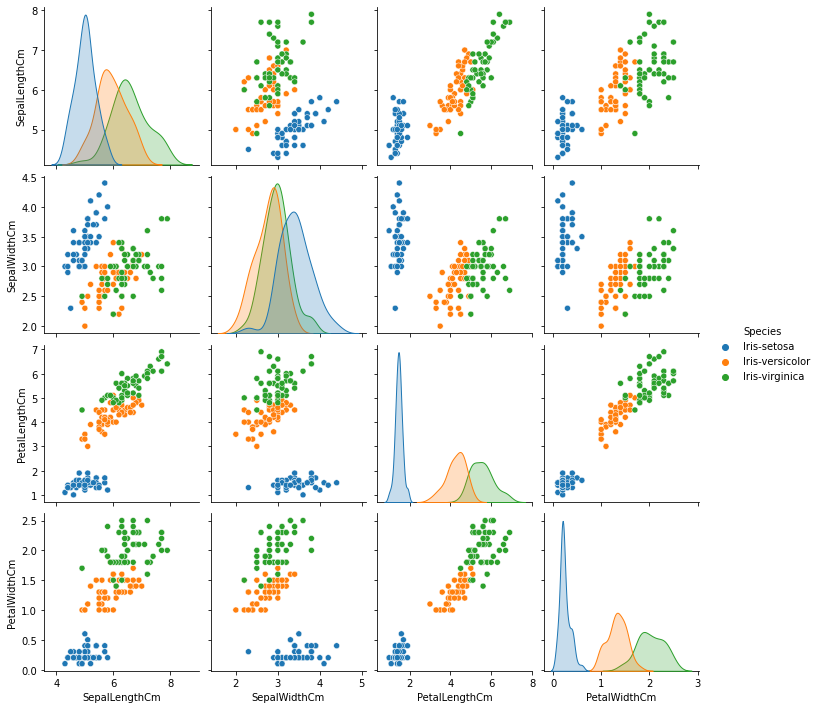

In [ ]:
# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show() # расскоментируйте, чтобы посмотреть

In [ ]:
# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

In [ ]:
# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)  # В материалах урока было: x.as_matrix() https://pandas.pydata.org/pandas-docs/version/0.25.1/reference/api/pandas.DataFrame.as_matrix.html

In [ ]:
# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values  # В материалах урока было: x.as_matrix() https://pandas.pydata.org/pandas-docs/version/0.25.1/reference/api/pandas.DataFrame.as_matrix.html
y = y.flatten()
y = to_one_hot(y)

In [ ]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

На трейне

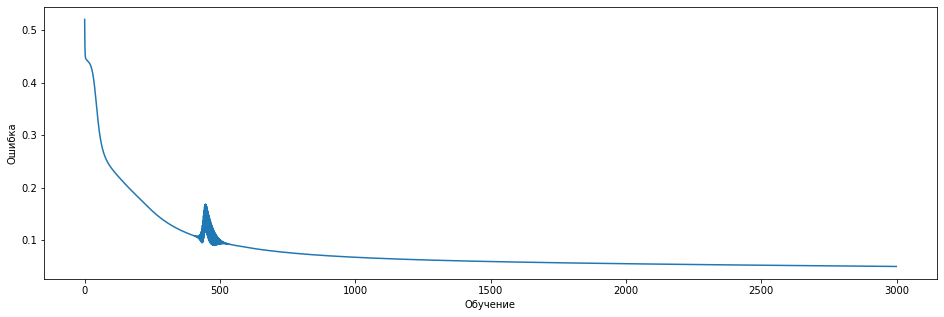

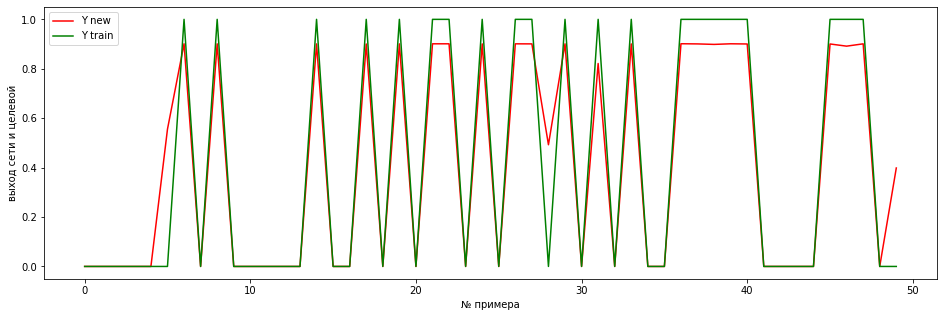

Аккуратность нейронной сети 95.06%


In [ ]:
### Шаг 3. Обученние нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 5

# присваевание случайных весов
w1 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода  !Переименовал номера весов, чтобы они соответствовали номеру уровня
w2 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода   !Переименовал номера весов, чтобы они соответствовали номеру уровня

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(3000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w1))
    layer2 = sigmoid(np.dot(layer1, w2))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w2.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w2 += layer1.T.dot(layer2_delta) * n
    w1 += layer0.T.dot(layer1_delta) * n
    # метрика модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N, 2], 'r',label = 'Y new')
plt.plot(y_train[:N, 2],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")



На тесте

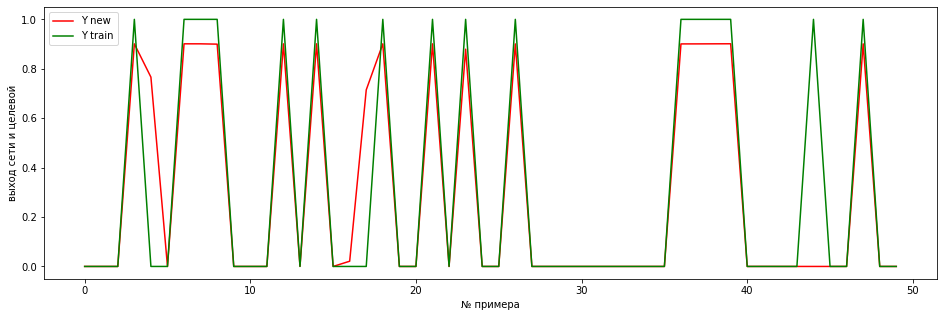

Аккуратность нейронной сети на тесте 94.71%


In [ ]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w1))
layer2_t = sigmoid(np.dot(layer1_t, w2))
layer2_error_t = y_test - layer2_t
    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,2], 'r',label = 'Y new')
plt.plot(y_test[:N,2],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

## Решение

Для удобства поместим весь код в функцию, возвращающую точность на тестовом датасете в зависимости от входных параметров

In [ ]:
def my_neural_network(X: pd.DataFrame,
                      y: pd.DataFrame,
                      neuron_numb: int,                      
                      learning_rate: float
                      ):
  """
  :param X: пространство признаков
  :param y: пространство целевой переменной
  :param neuron_numb: число нейронов скрытого слоя
  :param neuron_numb: скорость обучения
  :return: round(accuracy_t, 2) округленное значение "точности"
  """
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
  ### Шаг 3. Обученние нейронной сети

  # присваивание случайных весов
  w1 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, neuron_numb выхода  !Переименовал номера весов, чтобы они соответствовали номеру уровня
  w2 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - neuron_numb входов, 3 выхода   !Переименовал номера весов, чтобы они соответствовали номеру уровня

  # процесс обучения
  for i in range(3000):

      # прямое распространение(feed forward) на тренировочных данных
      layer0 = X_train
      layer1 = sigmoid(np.dot(layer0, w1))
      layer2 = sigmoid(np.dot(layer1, w2))

      # обратное распространение(back propagation) с использованием градиентного спуска
      layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
      layer2_delta = layer2_error * sigmoid_deriv(layer2)
      
      layer1_error = layer2_delta.dot(w2.T)
      layer1_delta = layer1_error * sigmoid_deriv(layer1)
      
      w2 += layer1.T.dot(layer2_delta) * learning_rate
      w1 += layer0.T.dot(layer1_delta) * learning_rate

  # прямое распространение(feed forward) на тестовых данных
  layer0_t = X_test
  layer1_t = sigmoid(np.dot(layer0_t, w1))
  layer2_t = sigmoid(np.dot(layer1_t, w2))
  layer2_error_t = y_test - layer2_t

  # метрика модели
  error_t = np.mean(np.abs(layer2_error_t))
  accuracy_t = (1 - error_t)*100
  return round(accuracy_t, 2)     

Проверим работу функции на значениях по умлочанию

In [ ]:
acc = my_neural_network(X=x, y=y, neuron_numb=5, learning_rate=0.1)
print(acc)

97.0


Для того, чтобы оценивать результат более адекватно, будем считать его несколько раз для разных иннициаций начальных весов:

In [ ]:
def true_neural_network(X: pd.DataFrame,
                      y: pd.DataFrame,
                      neuron_numb: int,                      
                      learning_rate: float,
                      N: int = 1,
                      ):
  """
  :param X: пространство признаков
  :param y: пространство целевой переменной
  :param neuron_numb: число нейронов скрытого слоя
  :param neuron_numb: скорость обучения
  :param N: количество начальных иннициаций
  :return: round(accuracy_t, 2) округленное значение "точности" посчитанное как среднее на N начальных иннициаций весов и стандартное отклонение
  """
  acc = []
  for i in range(N):
    acc.append(my_neural_network(X=x, y=y, neuron_numb=neuron_numb, learning_rate=learning_rate))
  res = round(np.mean(acc), 2)
  std = round(np.std(acc), 2) 
  return res, std

In [ ]:
acc, std = true_neural_network(X=x, y=y, neuron_numb=5, learning_rate=0.1, N=20)
print(f'{acc}% +- {std}%')

95.61% +- 1.51%


Таким образом "стартовый" показатель точности - 95.61% +- 1.51%

In [ ]:
nn_N = 15
lr_N = 12
acc_matrix = np.zeros((nn_N, lr_N))
std_matrix = np.zeros((nn_N, lr_N))
nn = np.array([int(x) for x in np.linspace(1, 15, nn_N)])
lr = np.array([round(x, 2) for x in np.linspace(0.01, 0.6, lr_N)])
for i in range(nn_N):
  nni = nn[i]
  print(f'neuron number: {nni}')
  for j in range(lr_N):
    lrj = lr[j]
    # print(f'learning rate: {lrj}')
    acc_matrix[i][j], std_matrix[i][j] = true_neural_network(X=x, y=y,
                                                              neuron_numb=nni,
                                                              learning_rate=lrj,
                                                              N=20)

neuron number: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


neuron number: 2
neuron number: 3
neuron number: 4
neuron number: 5
neuron number: 6
neuron number: 7
neuron number: 8
neuron number: 9
neuron number: 10
neuron number: 11
neuron number: 12
neuron number: 13
neuron number: 14
neuron number: 15


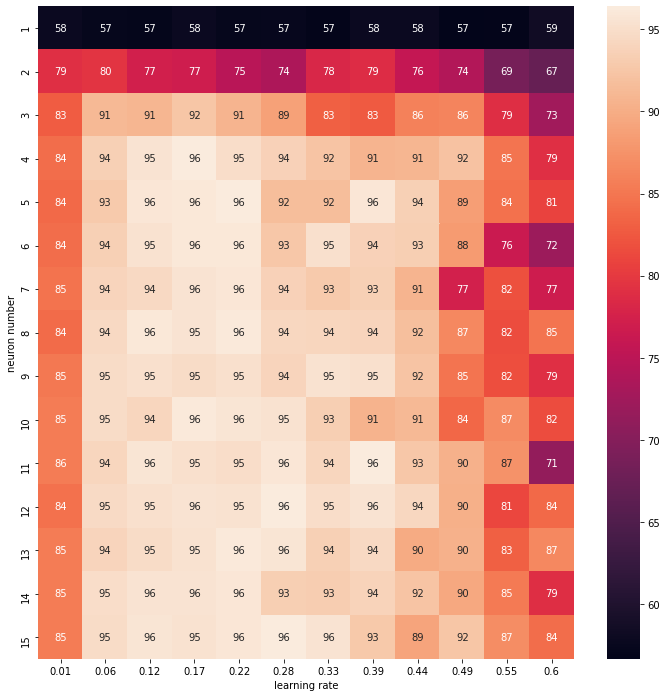

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data=acc_matrix, annot=True, xticklabels = lr, yticklabels = nn) 
plt.xlabel('learning rate')
plt.ylabel('neuron number')
plt.show()


Видно, что точность обучения в среднем падает при повышении значения скорости обучения и при снижении числа нейронов скрытого слоя.     
Однако, следует отметить, что все "большие" значения лежат в пределах 1 стандартного отклонения.    
Интересно, что снижение скорости обучения в два раза (до 0.05) не дает прироста в точности. Но при этом значении точность практически перестает зависеть от количества нейронов скрытого слоя.

Проверим эти выводы на "экстремальных" значениях

In [ ]:
acc, std = true_neural_network(X=x, y=y, neuron_numb=50, learning_rate=0.01, N=20)
print(f'{acc}% +- {std}%')

85.74% +- 0.95%


In [ ]:
acc, std = true_neural_network(X=x, y=y, neuron_numb=100, learning_rate=0.1, N=20)
print(f'{acc}% +- {std}%')

95.11% +- 1.14%


Интересно посмотреть на распределение стандартных отклонений

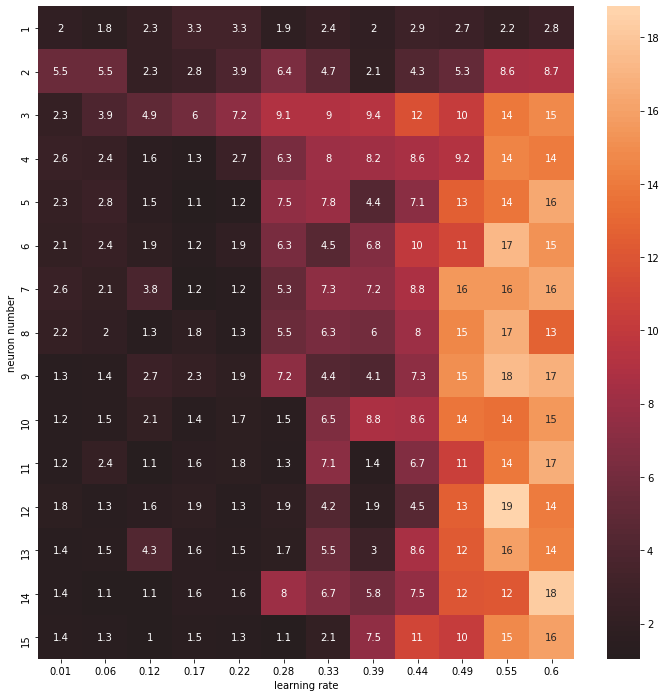

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data=std_matrix, annot=True, xticklabels = lr, yticklabels = nn, center=0) 
plt.xlabel('learning rate')
plt.ylabel('neuron number')
plt.show()